![](./img/logo.png)

# 2do Parcial: Análisis Exploratorio de Datos. 

### Nombre de los Estudiantes:
    * David Steven Arbeláez Chávez
    * David Rodriguez
### Cédula de Ciudadanía:  
    * 1000 253 275
# Objetivo:

En este cuaderno se busca realizar una serie de ejercicios



# Modelo **02**

### Descripción de Valores:

    join_date: fecha año-mes-dia hora:minuto:segundo.
    group: houston machine learning, houstonr, houston data science,
           houston energy data science, houston data visualization.
    city:  Houston, Katy, Orizaba, Spring, Cold Spring Harbor,
           Kenmore, Sugar Land, Colorado Springs, Pearland, Austin, ....
    state: TX, NY, WA, CO, MD, CA, LA, GA, MO, NC, FL, NH,
           MA, PA, KY, NE, IL, MN, TN, IN, OH, F2, NJ, NS, 
           VA, MI, 18, AR, AL, OR, DE, 17, ON, SC, BC, V5,
           WI, AB, DC, AK, UT, OK, AZ, MS, CT, IA.
    country: us, mx, il, be, cn, jp, gr, in, fr, my, de,
             ye, np, no, au, gb, dz, co, tw, br, ie, pk,
             ca, hk, nl, ng, ae, sg, eg, ir, es, nz, se,
             za, cz, th, ch, by, pe, fi, kr, si, ph.
         
    

## 0.- Bibliotecas y Lectura del dataframe

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import get_dummies

### _Se importa el data frame_ `meetup_groups `

In [3]:
df_meetup = pd.read_csv("https://raw.githubusercontent.com/DavidSArbelaez/Parcial_MetricasRendimiento/main/data/meetup_groups.csv")

## 1.- Identificación de datos perdidos (NaN)
    - Bonus --> ¿Cuantas Filas se han eliminado después de la limpieza?

### **Se identifica las columnas del dataframe**

In [4]:
df_meetup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7671 entries, 0 to 7670
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   join_date  7671 non-null   object
 1   group      7671 non-null   object
 2   city       7671 non-null   object
 3   state      7527 non-null   object
 4   country    7671 non-null   object
dtypes: object(5)
memory usage: 299.8+ KB


__Se muestran los valores unicos para identificar si hay valores nulos__

In [143]:
column_headers = list(df_meetup.columns.values)
for i in column_headers:
    
    a=str(i)
    print(f'Valores unicos de la columna {a} : \n    { (df_meetup[a].unique())}')
    print("***********************************************************************")
#df_meetup['state'].unique()


Valores unicos de la columna join_date : 
    ['2016-11-18 02:41:29' '2017-05-09 14:16:37' '2016-12-30 02:34:16' ...
 '2015-10-05 17:08:40' '2016-11-04 22:36:24' '2016-08-02 17:47:29']
***********************************************************************
Valores unicos de la columna group : 
    ['houston machine learning' 'houstonr' 'houston data science'
 'houston energy data science ' 'houston data visualization ']
***********************************************************************
Valores unicos de la columna city : 
    ['Houston' 'Katy' 'Orizaba' 'Spring' 'Cold Spring Harbor' 'Kenmore'
 'Sugar Land' 'Colorado Springs' 'Pearland' 'Austin' 'Tel Aviv-Yafo'
 'Baltimore' 'Garza García' 'Arlington' 'San Francisco' 'San Jose'
 'League City' 'Cypress' 'Stafford' 'Dallas' 'Friendswood' 'Lawtell'
 'Statesboro' 'North Houston' 'Brussels' 'Tomball' 'Beaumont' 'Bellaire'
 'Humble' 'Richmond' 'Port Lavaca' 'Montgomery' 'Rolla' 'Los Angeles'
 'Alameda' 'San Antonio' 'Bellevue' 'Durham' 'C

Se suma los nulos para poder identificarlos bien

In [144]:
df_meetup.isnull().sum()

join_date      0
group          0
city           0
state        144
country        0
dtype: int64

Tras realizar esta consulta de los datos unicos y tras revisar la información del data frame se puede afirmar el conjunto de datos tiene **datos Perdidos** en la columna `state` cuenta que con menos datos (los cuales fueron remplazados por datos nulos) que el resto de columnas, 144 datos menos.

Por lo que se va a quitar ese numero de columnas del resto de las columnas

In [145]:
#Se eliminan los datos nulos
df_meetup = df_meetup.dropna()

#Se verfica la informacion
df_meetup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7527 entries, 0 to 7670
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   join_date  7527 non-null   object
 1   group      7527 non-null   object
 2   city       7527 non-null   object
 3   state      7527 non-null   object
 4   country    7527 non-null   object
dtypes: object(5)
memory usage: 352.8+ KB


In [146]:
#Se verifica que se hayan quitado los datos nulos
df_meetup.isnull().sum()

join_date    0
group        0
city         0
state        0
country      0
dtype: int64

### Bonus

Se eliminaron 144 filas, debido a los datos nulos en la columna `state`

## 2.- ¿Cuantas reuniones por grupo se registraron en el DataFrame? 
    - 3. Haga un gráfico (Pastel) de reuniones por grupo en el DataFrame

<img src="./img/grupos-meetings.png" style="width:250px">

In [147]:
df_meetup.groupby('group').size()

group
houston data science            2150
houston data visualization      1709
houston energy data science     1891
houston machine learning         740
houstonr                        1037
dtype: int64

Se identifica que hubieron estas cantidades de reuniones en el dataframe :
- 2150 reuniones de `houston data science`
- 1709 reuniones de `houston data visualization `
- 1891 reuniones de `houston energy data science `
- 740 reuniones de `houston machine learning`
- 1037 reuniones de `houstonr`

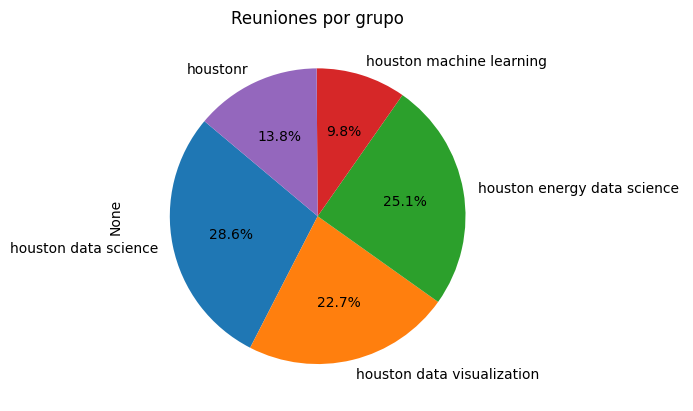

In [148]:
df_meetup.groupby('group').size().plot(y=df_meetup['group'].unique(),kind='pie',startangle=140,autopct='%1.1f%%', title='Reuniones por grupo')
plt.show()

### Conclusiones sobre el grafico

- Se realizaron mas reuniones en el grupo de `houston data science` con un 28.6% sobre el total de reuniones
- El grupo de `houston machine learning` fue en el que se realizaron menos reuniones con un 9.8%
- 

## 3.-  ¿Cuál es la proporción de reuniones en la ciudad Houston?

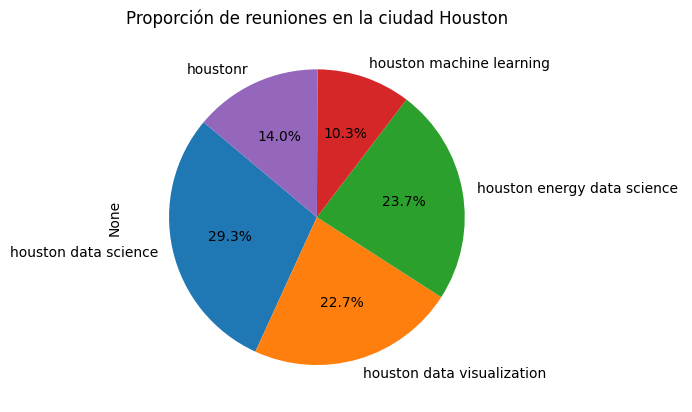

In [149]:
filtro = (df_meetup['city']=="Houston")
df_meetup[filtro].groupby('group').size().plot(
    y=df_meetup['group'].unique(),kind='pie',startangle=140,autopct='%1.1f%%', 
    title='Proporción de reuniones en la ciudad Houston')
plt.show()

La ciudad de Houston tiene la siguiente proporción para cada grupo de reunión:
- 1628 reuniones de `houston data science` y tiene un 29.3% del total de reuniones del dataframe
- 1264 reuniones de `houston data visualization ` y tiene un 22.7%
- 1320 reuniones de `houston energy data science `y tiene un 23.7%
- 572 reuniones de `houston machine learning` y tiene un 10.3%
- 776 reuniones de `houstonr` y tiene un 14%

## 4.- Cuáles son las 10 ciudades más usadas en USA para reuniones de los grupos:
    - 'houston machine learning ' y 'houstonr'

In [150]:
filtro = ((df_meetup['group']=="houston machine learning") | (df_meetup['group']=="houstonr")) & (df_meetup['country']=='us')
df_max=df_meetup[filtro].groupby('city').size().sort_values(ascending=False)
df_max.head(10)

city
Houston          1348
Katy               49
Spring             42
Sugar Land         32
Austin             25
Cypress            21
Pearland           16
Humble             14
League City        11
San Francisco      11
dtype: int64

Las 10 ciudades mas usadas en USA para reuniones de los grupos `houston machine learning` y `houstonr` son:
- `Houston` con una cantidad de **1348** reuniones
- `Katy` con una cantidad de **49** reuniones
- `Spring` con una cantidad de **42** reuniones
- `Sugar Land` con una cantidad de **32** reuniones
- `Austin` con una cantidad de **25** reuniones
- `Cypress` con una cantidad de **21** reuniones
- `Pearland` con una cantidad de **16** reuniones
- `Humble` con una cantidad de **14** reuniones
- `San Francisco` con una cantidad de **11** reuniones
- `League City` con una cantidad de **11** reuniones

## 5.- Cuáles son las ciudades más usadas para reuniones fuera del USA por:
    -  'houston machine learning' y 'houstonr'

In [151]:
filtro = ((df_meetup['group']=="houston machine learning") | (df_meetup['group']=="houstonr")) & (df_meetup['country']!='us')
df_max=df_meetup[filtro].groupby('city').size().sort_values(ascending=False)
df_max

city
London         2
Manchester     1
Mississauga    1
Winchester     1
dtype: int64

Las ciudades mas usadas por fuera de USA para reuniones de los grupos `houston machine learning` y `houstonr` son:
- `London` con una cantidad de **2** reuniones
- `Manchester` con una cantidad de **1** reuniones
- `Mississauga` con una cantidad de **1** reuniones
- `Winchester` con una cantidad de **1** reuniones

## 6.- El  grupo 'houston data visualization' cuando hace reuniones en USA:
    - ¿Es cierto que la segunda ciudad en donde hacen más reuniones es Austin?

In [179]:
houston=df_meetup.groupby('group').size().index[1]
filtro = ((df_meetup['group']==houston)) & (df_meetup['country']=='us')
df_max=df_meetup[filtro].groupby('city').size().sort_values(ascending=False)
df_max

city
Houston        1264
Spring           53
Sugar Land       36
Katy             35
Austin           27
               ... 
Galena Park       1
Gainesville       1
Franklin          1
Fort Worth        1
Winnetka          1
Length: 116, dtype: int64

La ciudad que mas reuniones de `houston data visualization` tiene es **Houston** y **Austin** es la cuarta

## 7.- ¿Cuál fue el mes que más reuniones tuvo el grupo 'houstonr' en el año 2016?

        - Agregar columna 'month' y 'year'

<img src="./img/graf02.png">

## 8.- ¿Cuantas reuniones por año se registraron en el DataFrame?

## 9.- ¿Cuantas veces por año se han reunido los grupos ('houston data science', 'houston machine learning') fuera de USA en el dataframe?